# **Trabalho 3**

Todos os anos centenas de filmes são lançados no mundo todo por diversas produtoras que contam com orçamentos de todos os tamanhos, gerando uma indústria bilhonária. Nesse contexto, você como cientista da computação recém formado foi contratado para monitorar em tempo real as impressões da platéia por meio de posts em redes sociais.

Basicamente o seu trabalho é monitorar as impressões positivas e negativas de um determinado filme, nos últimos dias (exemplo: 30 dias). Você poderá fazer isso lendo todas as postagens e interpretando cada uma como positiva ou negativa ou **usando** o conhecimento adquirido durante a graduação e, portanto, automatizar essa tarefa. **Faça a escolha correta** e automatize essa tarefa. 

Para auxiliar nessa tarefa, considere o dataset anterior e os conceitos estudados em sala de aula.

Escolha três filmes* já lançados de sua preferência para conduzir essa análise. Lembre-se que seu trabalho é apresentar uma forma automática de entender impressões positivas e negativas sobre os filmes escolhidos a partir de posts em uma rede social (no caso, o Twitter).

O que você precisa apresentar é:

+ uma análise sobre os posts referentes aos filmes escolhidos (isto é, o notebbok contendo o código e comentado. Seja organizado). Por exemplo, espera-se que no mínimo você apresente um gráfico de impressões positivas e negativas sobre cada filme escolhido nos últimos **n** dias.

+ fazer um vídeo de no máximo 5 minutos explicando as tuas principais estratégias.

**Data de entrega:** 10 de agosto de 2022

*Seja prudente na escolha dos filmes, de modo que haja comentários suficientes para a sua análise.

## Collecting tweets

In [ ]:
# %pip install python-dotenv tweepy
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas as pd
import tweepy
import os
import re

plt.style.use('fivethirtyeight')
load_dotenv()


### Steps

 Para fazer a coleta você precisa ter uma conta de desenvolvedor do Twitter. Obter a conta de desenvolvedor do Twitter pode levar um ou dois dias (para criar sua conta [clique aqui](https://developer.twitter.com/en))

Neste [link](https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795) tem um tutorial de como fazer isso.

### Grabbing some tweets
Os próximos trechos de código foram obtidos deste [link](https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795)

### Setup account

In [ ]:
# log=pd.read_csv('colocar_suas_credenciais')
consumer_key=os.getenv('API_KEY')
consumer_secret=os.environ['API_SECRET']
access_token=os.environ['ACCESS_TOKEN']
access_token_secret=os.environ['ACCESS_TOKEN_SECRET']
bearer_token=os.environ['BEARER_TOKEN']


In [ ]:
authenticate=tweepy.OAuthHandler(consumer_key,consumer_secret)
## set access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)
## create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)


In [ ]:
client = tweepy.Client(
    consumer_key=consumer_key, consumer_secret=consumer_secret,
    access_token=access_token, access_token_secret=access_token_secret,
    wait_on_rate_limit=True
)

print(api.verify_credentials().screen_name)


In [ ]:
movie_names = ["Thor Love and Thunder", "Diary of a wimpy kid", "Metal Lords"]

# tweets to be collected
tweet_count = 10_000
df = pd.DataFrame()

for movie in movie_names:
	t_query = movie + " exclude:retweets"
	tweets = tweepy.Cursor(api.search_tweets, q=t_query,
						result_type="recent", count=tweet_count, lang="en").items(tweet_count)
	list_tweets = [tweet for tweet in tweets]

	# load df from file if it exists
	try:
		df = pd.read_csv('./data/tweets.csv')
		print('Loaded tweets from file')
	except:
		print('Could not load file')

	for i, tweet in enumerate(list_tweets):
		# tweet to dict
		tweet_dict = tweet._json
		tweet_dict['movie'] = movie
		curr_df = pd.DataFrame([tweet_dict])

		df = pd.concat([df, curr_df], axis=0)

	display(df.head())


In [ ]:
# remove id duplicates
df = df.drop_duplicates(subset='id', keep='first')

# save df to csv
df.to_csv('./data/tweets.csv', index=False)


## Processing Tweets

In [1]:
# %pip install python-dotenv tweepy
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas as pd
import tweepy
import os
import re

plt.style.use('fivethirtyeight')
_ = load_dotenv()


### Load Data

In [2]:
df = pd.read_csv('./data/tweets.csv')

display(df.tail())


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
7882,Sun Jul 31 18:43:51 +0000 2022,1553813710581399554,1553813710581399554,metal lords is such a good movie,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
7883,Sun Jul 31 18:17:51 +0000 2022,1553807164493500416,1553807164493500416,Watching metal lords on netflix and my mother ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
7884,Sun Jul 31 18:15:09 +0000 2022,1553806488262647810,1553806488262647810,@RedAuroraaa Metal Lords,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.553734e+18,1.553734e+18,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
7885,Sun Jul 31 16:57:09 +0000 2022,1553786857921695744,1553786857921695744,Metal Lords [WEBRip – YTS] (2022),False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN
7886,Sun Jul 31 15:27:24 +0000 2022,1553764271632384000,1553764271632384000,@remi019786 basically rodrick from wimpy kid +...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.553764e+18,1.553764e+18,...,0,False,False,en,Metal Lords,NaN,NaN,NaN,NaN,NaN


### Preprocessing

In [3]:
# remove name of person who tweeted
df['text'] = df['text'].apply((lambda x: re.sub(r'@[A-Za-z0-9]+', '', x)))

# remove hashtags
df['text'] = df['text'].apply((lambda x: re.sub(r'#', '', x)))

# remove urls
df['text'] = df['text'].apply((lambda x: re.sub(r'https?://[A-Za-z0-9./]+', '', x)))

# clean tweets
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
df['text'] = df['text'].apply((lambda x: re.sub('\s+', ' ', x)))

# trim extra whitespace
df['text'] = df['text'].apply(lambda x: x.strip())


display(df.head())


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,Wed Aug 10 13:47:04 +0000 2022,1557362902276923393,1557362902276923393,you all could of done better with thor love a...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN
1,Wed Aug 10 13:41:56 +0000 2022,1557361606496882691,1557361606496882691,i think i figured out why some people hate pha...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN
2,Wed Aug 10 13:41:17 +0000 2022,1557361445456658443,1557361445456658443,thor love and thunder bts thor godofthunder t...,False,"{'hashtags': [{'text': 'thor', 'indices': [30,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,"{'media': [{'id': 1557361372979023875, 'id_str...",False,NaN,NaN,NaN
3,Wed Aug 10 13:37:39 +0000 2022,1557360532344242182,1557360532344242182,nah wtffff i guess i have more reason to hate ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,Thor Love and Thunder,NaN,False,1.557101e+18,1.557101e+18,{'created_at': 'Tue Aug 09 20:28:16 +0000 2022...
4,Wed Aug 10 13:33:03 +0000 2022,1557359374468775937,1557359374468775937,watching the sandman the week after seeing tho...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,3,False,False,en,Thor Love and Thunder,NaN,NaN,NaN,NaN,NaN


## Analysis

### Wordcloud

['Thor Love and Thunder' 'Diary of a wimpy kid' 'Metal Lords']
Wordcloud for Thor Love and Thunder created


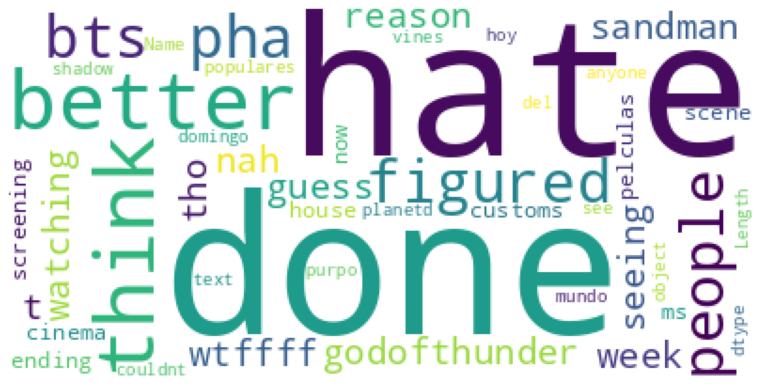

Wordcloud for Diary of a wimpy kid created


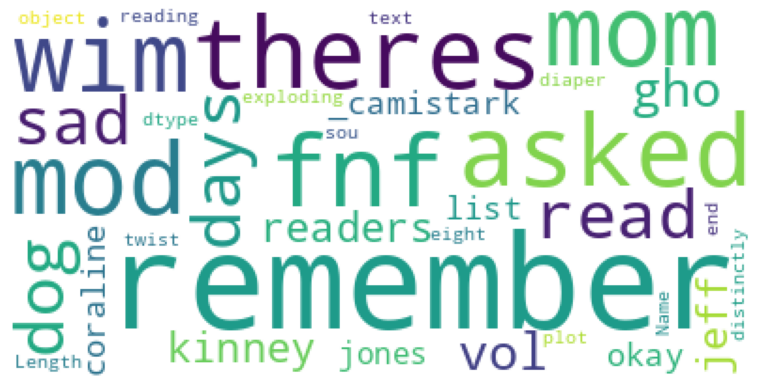

Wordcloud for Metal Lords created


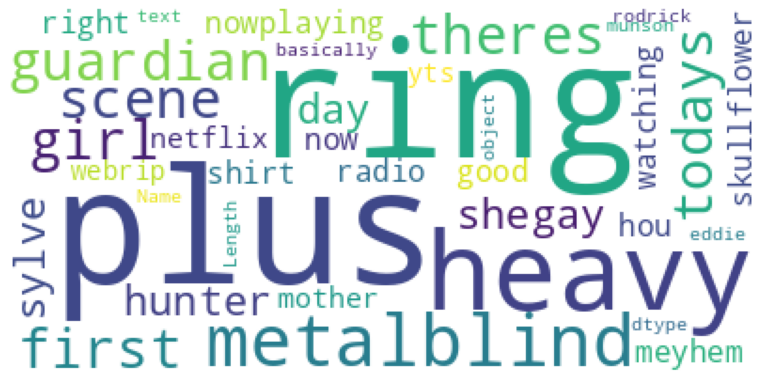

In [4]:
# create word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

movies = df['movie'].unique()

print(movies)

stopwords = set(STOPWORDS)
for stp_word in ['movie', 'thor', 'love', 'thunder', 'metal', 'lords', 'diary', 'wimpy', 'kid']:
    stopwords.add(stp_word)

for movie in movies:
    movie_df = df[df["movie"] == movie]

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        # max_words=200,
        # max_font_size=40,
        # min_font_size=10,
        random_state=42
    ).generate(str(movie_df['text']))

    wordcloud.to_file('./data/wordcloud.png')

    print('Wordcloud for {} created'.format(movie))
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


### Sentiment Analysis

In [5]:
# perform sentiment analysis
from textblob import TextBlob


def sentiment_analysis(df):
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

df = sentiment_analysis(df)
display(df[['text', 'sentiment']].head())


,text,sentiment
0,you all could of done better with thor love a...,0.400000
1,i think i figured out why some people hate pha...,-0.450000
2,thor love and thunder bts thor godofthunder t...,0.500000
3,nah wtffff i guess i have more reason to hate ...,0.066667
4,watching the sandman the week after seeing tho...,0.500000


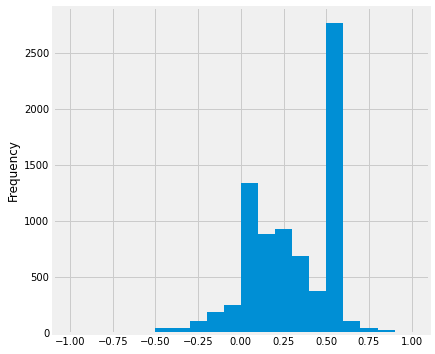

In [6]:
# create sentiment graph
df['sentiment'].plot(kind='hist', bins=20, figsize=(6, 6))
plt.show()


In [7]:
# perform sentiment analysis using transformers
from transformers import pipeline


sentiment_analysis = pipeline("sentiment-analysis")

# apply sentiment analysis
df['sentiment'] = df['text'].apply(lambda x: sentiment_analysis(x))

display(df[['text', 'sentiment']].head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,text,sentiment
0,you all could of done better with thor love a...,"[{'label': 'NEGATIVE', 'score': 0.997150599956..."
1,i think i figured out why some people hate pha...,"[{'label': 'NEGATIVE', 'score': 0.999630331993..."
2,thor love and thunder bts thor godofthunder t...,"[{'label': 'POSITIVE', 'score': 0.989458799362..."
3,nah wtffff i guess i have more reason to hate ...,"[{'label': 'NEGATIVE', 'score': 0.998903989791..."
4,watching the sandman the week after seeing tho...,"[{'label': 'NEGATIVE', 'score': 0.998061835765..."


In [8]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: x[0]['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x[0]['score'])

display(df[['sentiment_label', 'sentiment_score', 'text']].head())


,sentiment_label,sentiment_score,text
0,NEGATIVE,0.997151,you all could of done better with thor love a...
1,NEGATIVE,0.999630,i think i figured out why some people hate pha...
2,POSITIVE,0.989459,thor love and thunder bts thor godofthunder t...
3,NEGATIVE,0.998904,nah wtffff i guess i have more reason to hate ...
4,NEGATIVE,0.998062,watching the sandman the week after seeing tho...


In [9]:
df['sentiment_label'].unique()


array(['NEGATIVE', 'POSITIVE'], dtype=object)

In [10]:
def unify_score(row):
    row_label = row['sentiment_label']
    row_score = row['sentiment_score']

    return -row_score if row_label == "NEGATIVE" else row_score

df['sentiment'] = df[['sentiment_label', 'sentiment_score']].apply(unify_score, axis=1)

display(df[['sentiment', 'text']].head())


,sentiment,text
0,-0.997151,you all could of done better with thor love a...
1,-0.999630,i think i figured out why some people hate pha...
2,0.989459,thor love and thunder bts thor godofthunder t...
3,-0.998904,nah wtffff i guess i have more reason to hate ...
4,-0.998062,watching the sandman the week after seeing tho...


### Save Checkpoint

In [11]:
# save df to csv
df.to_csv('./data/sentimental_tweets.csv', index=False)


### Load Checkpoint

In [12]:
# load df from file if it exists
df = pd.read_csv('./data/sentimental_tweets.csv')

display(df.tail())


,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,movie,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,sentiment,sentiment_label,sentiment_score
7882,Sun Jul 31 18:43:51 +0000 2022,1553813710581399554,1553813710581399554,metal lords is such a good movie,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,en,Metal Lords,NaN,NaN,NaN,NaN,NaN,0.999860,POSITIVE,0.999860
7883,Sun Jul 31 18:17:51 +0000 2022,1553807164493500416,1553807164493500416,watching metal lords on netflix and my mother ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,en,Metal Lords,NaN,NaN,NaN,NaN,NaN,-0.950850,NEGATIVE,0.950850
7884,Sun Jul 31 18:15:09 +0000 2022,1553806488262647810,1553806488262647810,metal lords,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.553734e+18,1.553734e+18,...,en,Metal Lords,NaN,NaN,NaN,NaN,NaN,0.981858,POSITIVE,0.981858
7885,Sun Jul 31 16:57:09 +0000 2022,1553786857921695744,1553786857921695744,metal lords [webrip yts] 2022,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,en,Metal Lords,NaN,NaN,NaN,NaN,NaN,-0.945852,NEGATIVE,0.945852
7886,Sun Jul 31 15:27:24 +0000 2022,1553764271632384000,1553764271632384000,basically rodrick from wimpy kid eddie munson...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.553764e+18,1.553764e+18,...,en,Metal Lords,NaN,NaN,NaN,NaN,NaN,-0.982777,NEGATIVE,0.982777


### Check sentiment distribution

<AxesSubplot:ylabel='Frequency'>

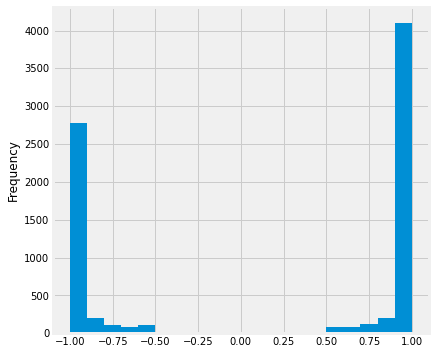

In [13]:
# create sentiment graph
df['sentiment'].plot(kind='hist', bins=20, figsize=(6, 6))


In [16]:
# most negative comment per movie

movies = df["movie"].unique()

for movie in movies:
    movie_df = df[df["movie"] == movie]

    # sort select only negative
    neg_df = movie_df.sort_values(by=["sentiment"])

    print(f"\n-- {movie} --")
    for row in neg_df[["sentiment", "text"]].head().itertuples():
        _, sentiment, tweet = row
        print(f"[{sentiment:.8f}] {tweet.strip()}")



-- Thor Love and Thunder --
[-0.99981648] _xo _reddick identity politics is bad writing the mcu phase
[-0.99981517] thor love and thunder is an absolute mess of a film so so bad
[-0.99981374] okay lets see how bad this movie is nowwatching thor love and thunder
[-0.99981350] thor love and thunder is the worst thing ive watched this year the jokes are tired in fact it seems every singl
[-0.99981099] venom 1 is boring the plot is generic asf thor love and thunder is an unfunny unfinished mess of a film

-- Diary of a wimpy kid --
[-0.99980253] i would want the diary of a wimpy kid so bad
[-0.99979275] this is just a shitty version of when everyone in 2018 made diary of a wimpy kid parody accounts
[-0.99978393] unless its diary of a wimpy kid the after fanfic or harry potter it will not catch my attention
[-0.99974459] 51 diary of a wimpy kid the movie i feel like im missing somethingsomeone this movie sucks
[-0.99974328] _overkill like mod loader but also its a diary of a wimpy kid refe

In [17]:
# most positive comment per movie

movies = df["movie"].unique()

for movie in movies:
    movie_df = df[df["movie"] == movie]

    # sort select only positive
    pos_df = movie_df.sort_values(by=["sentiment"], ascending=False)

    print(f"\n-- {movie} --")
    for row in pos_df[["sentiment", "text"]].head().itertuples():
        _, sentiment, tweet = row
        print(f"[{sentiment:.8f}] {tweet.strip()}")



-- Thor Love and Thunder --
[0.99989140] thor love and thunder was just heartbreaking and beautiful and funny and sweet and epic enjoyed every minute
[0.99989009] thor love and thunder is an incredibly fun and wonderful movie
[0.99988937] thor love and thunder is fantastic and fun and i loved it
[0.99988735] thor love and thunder is a pretty good and fun movie i feel like im alone in feeling thor is a pretty well developed character
[0.99988675] thor love and thunder is a wonderful complete movie

-- Diary of a wimpy kid --
[0.99980587] diary of a wimpy kid is quite good
[0.99979073] more diary of a wimpy kid appreciation nice also i agree and rodrick is definitely the best character in the bo
[0.99978369] diary of a wimpy kid rodrick rules is the best movie in that series
[0.99978012] happy national book lovers day this day celebrates literature amp books motivating people to simply read sit back
[0.99977499] diary of a wimpy kid is one of the best book series ive ever read

-- Metal